In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# GET the data
## Memuat Data
import pandas as pd

dataset = pd.read_csv("Capres2014-1.1.csv", usecols=["Isi_Tweet", "Sentimen"])
dataset

,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",-1
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,-1
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",-1
...,...,...
1880,Jangan kabur dari tanggung jawab dengan kemasa...,1
1881,@echo_hadiwibowo mana berani pmrntah..m G da y...,1
1882,@IndonesiaCapres ANAK MEDAN DUKUNG CAPRES JK D...,1
1883,"RT @idoidonajib: Jelek! ""@fallenokta: Apa komp...",1


In [3]:
## Mengecek Imbalanced Data
dataset['Sentimen'].value_counts()

 1    1117
-1     768
Name: Sentimen, dtype: int64

In [4]:
dataset.drop_duplicates(inplace=True)
dataset

,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",-1
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,-1
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",-1
...,...,...
1880,Jangan kabur dari tanggung jawab dengan kemasa...,1
1881,@echo_hadiwibowo mana berani pmrntah..m G da y...,1
1882,@IndonesiaCapres ANAK MEDAN DUKUNG CAPRES JK D...,1
1883,"RT @idoidonajib: Jelek! ""@fallenokta: Apa komp...",1


In [5]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [6]:
ros=RandomOverSampler(random_state=42)
X=np.array(dataset['Isi_Tweet']).reshape(-1,1)
y=np.array(dataset['Sentimen']).reshape(-1,1)
X_res, y_res = ros.fit_resample(X, y)
X_res=X_res.flatten()
print(X_res.shape,y_res.shape)

(1914,) (1914,)


In [7]:
d={'Isi_Tweet':X_res,'Sentimen':y_res}
dataset=pd.DataFrame(data=d)
dataset

,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",-1
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,-1
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",-1
...,...,...
1909,PPP galang Partai2 Islam Bersatu Lawan Capres ...,-1
1910,"Gimana mau jadi presiden ARB itu, nyebut nama ...",-1
1911,@Jayusays mantan wakil presiden? Jusuf kalla? :D,-1
1912,@donahchristiana @kompascom ical gak pantes ja...,-1


In [8]:
## Mengganti {-1,1} menjadi {0,1}
dataset['Sentimen'] = dataset['Sentimen'].replace(-1,0)
dataset.head()

,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",0
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,0
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",0


In [9]:
dataset['Sentimen'].value_counts()

0    957
1    957
Name: Sentimen, dtype: int64

In [10]:
# MODEL the data
## Pra Pengolahan - Cleaning
import numpy as np
import re
import string

def clean_text(tweet):
    
    # Convert to lower case
    tweet = tweet.lower()
    # remove unicode characters
    tweet = tweet.encode('ascii', 'ignore').decode()
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub("\\W"," ",tweet) 
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('\,', ' ', tweet)
    tweet = re.sub('\)', ' ', tweet)
    tweet = re.sub('\:', ' ', tweet)
    tweet = re.sub('\-', ' ', tweet)
    tweet = re.sub('\!', ' ', tweet)
    tweet = re.sub('\"', ' ', tweet)
    tweet = re.sub('\.', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    
    return tweet

dataset["Isi_Tweet"] = dataset['Isi_Tweet'].map(lambda x: clean_text(x))
# Convert the titles to lowercase
dataset["Isi_Tweet"] = dataset["Isi_Tweet"].map(lambda x: x.lower())
dataset = dataset[dataset['Isi_Tweet'].apply(lambda x: len(x.split()) >=1)]
dataset.shape

(1914, 2)

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def wordopt(text):
    text = re.sub(' tersebut ', '', text)
    text = re.sub(' gak ', ' tidak ', text)
    text = re.sub(' tdk ', ' tidak ', text)
    text = re.sub(' tak ', ' tidak ', text)
    text = re.sub(' ga ', ' tidak ', text)
    text = re.sub(' gk ', ' tidak ', text)
    text = re.sub(' tidak ', ' ', text)
    text = re.sub('yg ', 'yang ', text)
    text = re.sub(' yang ', ' ', text)
    text = re.sub(' tp ', ' tapi ', text)
    text = re.sub(' jdi ', ' jadi ', text)
    text = re.sub(' jd ', ' jadi ', text)
    text = re.sub(' jadi ', ' ', text)
    text = re.sub(' org ', ' orang ', text)
    text = re.sub(' hehe ', ' ', text)
    text = re.sub(' hehehe ', ' ', text)
    text = re.sub(' wakakak ', ' ', text)
    text = re.sub(' jls ', ' jelas ', text)
    text = re.sub(' sdh ', ' sudah ', text)
    text = re.sub(' trus ', ' terus ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' wapres ', ' cawapres ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' sy ', ' saya ', text)
    text = re.sub(' aku ', ' saya ', text)
    text = re.sub(' gue ', ' saya ', text)
    text = re.sub(' blm ', ' belum ', text)
    text = re.sub('klo ', ' kalau ', text)
    text = re.sub('kalo ', ' kalau ', text)
    text = re.sub(' kalau ', ' ', text)
    text = re.sub(' calon presiden ', ' capres ', text)
    text = re.sub(' mega ', ' megawati ', text)
    text = re.sub(' jkt ', ' jakarta ', text)
    text = re.sub(' deh ', ' ', text)
    text = re.sub('2013', '', text)
    text = re.sub(' rt ', ' ', text)
    text = re.sub(' wakilnya ', ' wakil ', text)
    text = re.sub(' lg ', ' ', text)
    text = re.sub(' gt ', ' ', text)
    text = re.sub(' ahhh ', ' ', text)
    text = re.sub(' cm ', ' ', text)
    text = re.sub(' dr ', ' ', text)
    text = re.sub(' kan ', ' ', text)
    text = re.sub(' ibu ', ' ', text)
    text = re.sub(' akn ', ' akan ', text)
    text = re.sub(' nih ', ' ', text)
    text = re.sub(' jg ', ' ', text)
    text = re.sub(' cawapresnya ', ' cawapres ', text)
    text = re.sub(' pak ', ' ', text)
    text = re.sub(' followradiopepatah ',' ',text)
    text = re.sub(' d ', ' ', text)
    text = re.sub(' p ', ' ', text)
    text = re.sub('rt ', ' ', text)
    text = re.sub(' bu ', ' ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' jgn ', ' ', text)
    text = re.sub(' sbg ', ' ', text)
    text = re.sub(' pd ', ' ', text)
    text = re.sub(' pa ', ' ', text)
    text = re.sub(' pas ', ' ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' kok ', ' ', text)
    text = re.sub(' masa ', ' ', text)
    text = re.sub(' om ', ' ', text)
    text = re.sub(' siapa ', ' ', text)
    text = re.sub(' ada ', ' ', text)
    text = re.sub(' gub ', ' gubernur ', text)
    text = re.sub(' apa ', ' ', text)
    text = re.sub(' aja ', ' ', text)
    text = re.sub(' joko widodo ', ' jokowi ', text)
    text = re.sub('tuit', ' ', text)
    text = re.sub(' nya ', ' ', text)
    text = re.sub(' jusuf kalla ', ' jk ', text)
    text = re.sub(' dong ', ' ', text)
    text = re.sub(' cuma ', ' ', text)
    text = re.sub(' dgn ', ' ', text)
    text = re.sub(' dg ', ' ', text)
    text = re.sub(' dong ', ' ', text)
    text = re.sub(' hayoo ', ' ', text)
    text = re.sub(' mau ', ' ingin ', text)
    text = re.sub(' ndak ', ' tidak ', text)
    text = re.sub(' pikir ', ' berpikir ', text)

    return text

dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(wordopt)
dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(stopword.remove)
dataset.shape

(1914, 2)

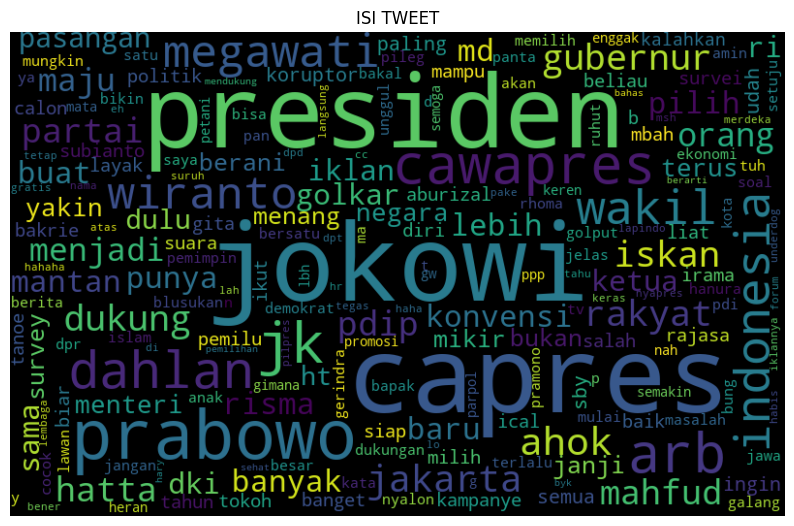

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_word = ' '.join(dataset["Isi_Tweet"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("ISI TWEET")
plt.show()

In [14]:
## Pra Pengolahan - Splitting
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(dataset['Isi_Tweet'], dataset['Sentimen'], test_size=0.1,random_state=42)

In [15]:
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import IPython

bert_tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 128, 
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask

def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        token, mask = tokenisasi(teks)
        tokenID.append(token)
        input_mask.append(mask)
    
    return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 128), 
            np.asarray(input_mask, dtype=np.int32).reshape(-1,128)]

bert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2", trainable=False)
def bert(hp):
    
    #Input layer
    input_token = keras.layers.Input(shape=(128,), dtype=np.int32,
                                    name="input_token")
    input_mask = keras.layers.Input(shape=(128,), dtype=np.int32,
                                   name="input_mask")

    #Embedding
    bert_embedding = bert_model([input_token, input_mask])[0]
    
    #LSTM Layer
    LSTM_act='tanh'
    LSTM_neurons=hp.Int('LSTM_neurons',min_value=8,max_value=128,step=8)
    LSTM_regularizer=keras.regularizers.l2(hp.Choice('kernel_LSTM',values=[0.1,0.01,0.001]))
    LSTM_layer=keras.layers.LSTM(LSTM_neurons,activation=LSTM_act,kernel_regularizer=LSTM_regularizer)(bert_embedding)
    #Dense Layer
    Dense_act=hp.Choice('Dense_act',values=['sigmoid','relu'])
    Dense_neurons=hp.Int('Dense_neurons',min_value=8,max_value=128,step=8)
    Dense_regularizer=keras.regularizers.l2(hp.Choice('kernel_dense',values=[0.1,0.01,0.001]))
    Dense_layer=keras.layers.Dense(Dense_neurons,activation=Dense_act,kernel_regularizer=Dense_regularizer)(LSTM_layer)
    #Output layer
    output = keras.layers.Dense(1, activation='sigmoid',
                                kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_output', values = [0.1,0.01, 0.001])))(Dense_layer)
    
    model = keras.models.Model(inputs=[input_token, input_mask], outputs=output)
    opt=keras.optimizers.Adam(
        learning_rate=hp.Float('lr',1e-3,1e-2,sampling='log'),
        decay=hp.Float('weight decay',1e-3,1e-2,sampling='log')
    )
    model.compile(optimizer = opt,
                  loss ='binary_crossentropy',
                  metrics=['accuracy'])
   
    return model

class ClearTrainingOutput(keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [16]:
from keras_tuner.tuners import BayesianOptimization

bert_train_data = create_input(train_data)
bert_test_data = create_input(test_data)


tuner = BayesianOptimization(bert,
                             objective = 'val_accuracy', 
                             max_trials = 15,
                             directory = '/content/Hasil',
                             project_name = 'Sentiment-BERT',
                             overwrite = True)
tuner.search_space_summary()

Search space summary
Default search space size: 8
LSTM_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
kernel_LSTM (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
Dense_act (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
Dense_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
kernel_dense (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
kernel_output (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
weight decay (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [17]:
tuner.search(bert_train_data, train_labels,
             batch_size=5, epochs=100,
             validation_data=(bert_test_data, test_labels),
             callbacks=[early_stop, ClearTrainingOutput()])

#best_hps = tuner.get_best_hyperparameters()[0]
#model = tuner.hypermodel.build(best_hps)
# Mendapatkan model terbaik
model = tuner.get_best_models()[0]

Trial 15 Complete [00h 18m 02s]
val_accuracy: 0.8333333134651184

Best val_accuracy So Far: 0.8697916865348816
Total elapsed time: 04h 28m 14s
INFO:tensorflow:Oracle triggered exit


In [18]:
test_loss, test_acc = model.evaluate(bert_test_data, test_labels)
print('Test accuracy:', test_acc)

6/6 [==============================] - 6s 548ms/step - loss: 0.4404 - accuracy: 0.8698
Test accuracy: 0.8697916865348816


In [19]:
model.save('Data/model_mlp_sentiment.h5')

#model = keras.models.load_model('Data/model_mlp_sentiment.h5')